In [1]:
# !pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0  stable_baselines gym-anytrading 
# !pip install gym


In [2]:
import gym 
import gym_anytrading
import tensorflow as tf

# %tensorflow_version 1.x

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd 
# import matplotlib as plt
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\DIP_LAB\anaconda3\envs\RLearninng\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [3]:
data_frame = pd.read_csv("gmedata.csv")
data_frame.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [4]:
data_frame.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [5]:
# We need to convert the date object to date time because gym allows that only
data_frame["Date"] =  pd.to_datetime(data_frame["Date"])
data_frame.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [6]:
#setting the column as index
data_frame.set_index('Date', inplace=True)
data_frame.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [7]:
env = gym.make('stocks-v0', df=data_frame, frame_bound=(5,100), window_size=5)

In [8]:
env.prices

array([264.5 , 260.  , 265.  , 246.9 , 194.5 , 137.74, 132.35, 124.18,
       118.18, 120.4 , 101.74, 108.73,  91.71,  44.97,  46.  ,  40.59,
        40.69,  45.94,  49.51,  52.4 ,  51.1 ,  51.2 ,  50.31,  60.  ,
        63.77,  53.5 ,  92.41,  90.  , 225.  , 325.  , 193.6 , 347.51,
       147.98,  76.79,  65.01,  43.03,  39.12,  39.36,  35.5 ,  39.91,
        31.4 ,  19.95,  19.94,  17.69,  18.08,  18.36,  17.37,  17.25,
        18.84,  19.26,  19.38,  20.99,  20.15,  20.57,  19.46,  15.53,
        15.63,  14.83,  13.85,  13.85,  12.72,  13.31,  14.12,  13.66,
        16.94,  16.35,  16.9 ,  16.12,  16.58,  15.8 ,  16.56,  16.08,
        14.75,  13.67,  13.9 ,  12.71,  12.46,  11.57,  11.63,  12.06,
        11.01,  11.13,  11.75,  11.1 ,  11.49,  11.86,  11.45,  10.91,
        11.57,  10.75,  10.47,  11.73,  11.82,  12.69,  13.45,  15.  ,
        14.91,  14.1 ,  13.86,  13.91])

In [9]:
env.signal_features

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

## Build Environment 

info {'total_reward': -106.86999999999998, 'total_profit': 0.11545452537527788, 'position': 1}


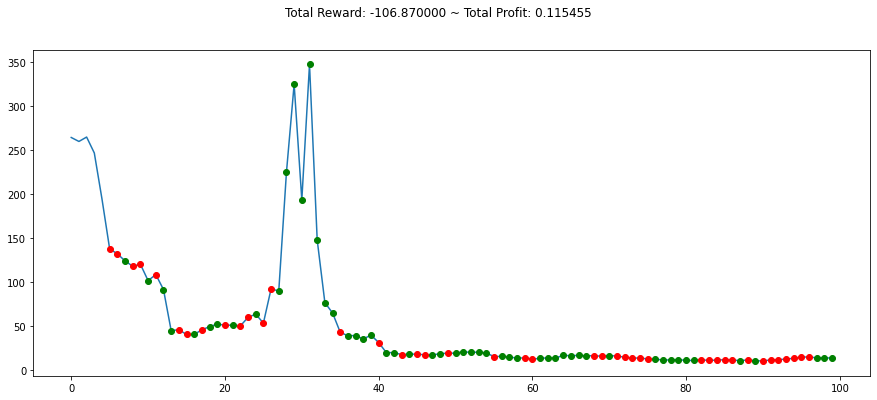

In [10]:
state = env.reset()
while True:
    actions = env.action_space.sample()
    n_state, reward, done, info = env.step(actions)
    if done:
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## Build Environment and Train 

In [11]:
env_maker = lambda : gym.make('stocks-v0', df=data_frame, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [12]:
model = A2C("MlpLstmPolicy", env, verbose= 1)
model.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.00125  |
| fps                | 9        |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 26.6     |
---------------------------------
---------------------------------
| explained_variance | -0.00187 |
| fps                | 191      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 1.33e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.138   |
| fps                | 237     

---------------------------------
| explained_variance | 0.00187  |
| fps                | 288      |
| nupdates           | 1600     |
| policy_entropy     | 0.68     |
| total_timesteps    | 8000     |
| value_loss         | 1.27e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.0828  |
| fps                | 290      |
| nupdates           | 1700     |
| policy_entropy     | 0.418    |
| total_timesteps    | 8500     |
| value_loss         | 3.28e+03 |
---------------------------------
---------------------------------
| explained_variance | -406     |
| fps                | 292      |
| nupdates           | 1800     |
| policy_entropy     | 0.0775   |
| total_timesteps    | 9000     |
| value_loss         | 0.00144  |
---------------------------------
----------------------------------
| explained_variance | -1.78e+04 |
| fps                | 291       |
| nupdates           | 1900      |
| policy_entropy     | 0.0331    |
| total_t

---------------------------------
| explained_variance | -1.63    |
| fps                | 298      |
| nupdates           | 4600     |
| policy_entropy     | 0.00346  |
| total_timesteps    | 23000    |
| value_loss         | 2.07e-05 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 298      |
| nupdates           | 4700     |
| policy_entropy     | 0.0025   |
| total_timesteps    | 23500    |
| value_loss         | 0.000239 |
---------------------------------
---------------------------------
| explained_variance | -159     |
| fps                | 295      |
| nupdates           | 4800     |
| policy_entropy     | 0.00992  |
| total_timesteps    | 24000    |
| value_loss         | 0.00024  |
---------------------------------
---------------------------------
| explained_variance | -4.13    |
| fps                | 295      |
| nupdates           | 4900     |
| policy_entropy     | 0.000588 |
| total_timest

---------------------------------
| explained_variance | -260     |
| fps                | 314      |
| nupdates           | 7600     |
| policy_entropy     | 0.00257  |
| total_timesteps    | 38000    |
| value_loss         | 9.43e-05 |
---------------------------------
---------------------------------
| explained_variance | -42.4    |
| fps                | 314      |
| nupdates           | 7700     |
| policy_entropy     | 0.000687 |
| total_timesteps    | 38500    |
| value_loss         | 8.14e-06 |
---------------------------------
---------------------------------
| explained_variance | -10.3    |
| fps                | 314      |
| nupdates           | 7800     |
| policy_entropy     | 0.000751 |
| total_timesteps    | 39000    |
| value_loss         | 1.15e-06 |
---------------------------------
---------------------------------
| explained_variance | -7.26    |
| fps                | 314      |
| nupdates           | 7900     |
| policy_entropy     | 0.000908 |
| total_timest

---------------------------------
| explained_variance | -4.32    |
| fps                | 306      |
| nupdates           | 10700    |
| policy_entropy     | 0.00629  |
| total_timesteps    | 53500    |
| value_loss         | 0.00084  |
---------------------------------
---------------------------------
| explained_variance | -6.96    |
| fps                | 305      |
| nupdates           | 10800    |
| policy_entropy     | 0.00441  |
| total_timesteps    | 54000    |
| value_loss         | 0.000892 |
---------------------------------
---------------------------------
| explained_variance | -4.47    |
| fps                | 305      |
| nupdates           | 10900    |
| policy_entropy     | 0.00108  |
| total_timesteps    | 54500    |
| value_loss         | 0.000114 |
---------------------------------
---------------------------------
| explained_variance | -57.6    |
| fps                | 304      |
| nupdates           | 11000    |
| policy_entropy     | 0.00113  |
| total_timest

---------------------------------
| explained_variance | 0.448    |
| fps                | 307      |
| nupdates           | 13800    |
| policy_entropy     | 0.00354  |
| total_timesteps    | 69000    |
| value_loss         | 0.00313  |
---------------------------------
---------------------------------
| explained_variance | -171     |
| fps                | 307      |
| nupdates           | 13900    |
| policy_entropy     | 0.00013  |
| total_timesteps    | 69500    |
| value_loss         | 0.0262   |
---------------------------------
---------------------------------
| explained_variance | -75.5    |
| fps                | 308      |
| nupdates           | 14000    |
| policy_entropy     | 2.88e-05 |
| total_timesteps    | 70000    |
| value_loss         | 0.00277  |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 308      |
| nupdates           | 14100    |
| policy_entropy     | 1.23e-05 |
| total_timest

---------------------------------
| explained_variance | -22.3    |
| fps                | 315      |
| nupdates           | 16900    |
| policy_entropy     | 8.33e-07 |
| total_timesteps    | 84500    |
| value_loss         | 0.00168  |
---------------------------------
---------------------------------
| explained_variance | -2.52    |
| fps                | 315      |
| nupdates           | 17000    |
| policy_entropy     | 0.165    |
| total_timesteps    | 85000    |
| value_loss         | 3.22e+04 |
---------------------------------
---------------------------------
| explained_variance | -74      |
| fps                | 315      |
| nupdates           | 17100    |
| policy_entropy     | 9.29e-07 |
| total_timesteps    | 85500    |
| value_loss         | 0.00506  |
---------------------------------
---------------------------------
| explained_variance | 0.212    |
| fps                | 315      |
| nupdates           | 17200    |
| policy_entropy     | 8.97e-07 |
| total_timest

---------------------------------
| explained_variance | -0.0354  |
| fps                | 317      |
| nupdates           | 20000    |
| policy_entropy     | 7.1e-07  |
| total_timesteps    | 100000   |
| value_loss         | 0.000138 |
---------------------------------


## Evaluation

In [13]:
env= gym.make('stocks-v0', df=data_frame, frame_bound=(90,100), window_size=5)               
obs = env.reset()
while True:
    obs = obs [np.newaxis,...]
    actions, _state = model.predict(obs)
    obs, reward, done, info = env.step(actions)
    if done:
        print("info", info)
        break
        

info {'total_reward': 0.0, 'total_profit': 1.1681198209718668, 'position': 1}


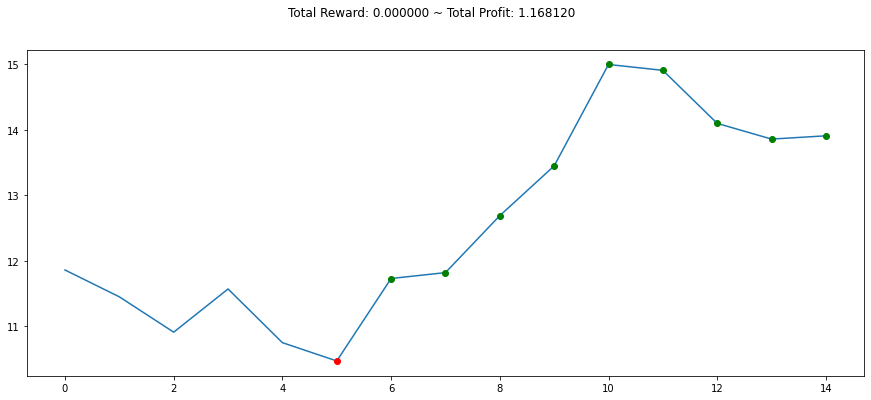

In [14]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()